In [21]:
import os
import csv
import pandas as pd
import pprint as pp

def count_rows(filename):
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        row_count = sum(1 for row in csv_reader)
    return row_count

# Adjust this directory for your local setup
mimic_dir = '/Users/vince/Documents/MIMIC/'
os.listdir(mimic_dir)

['.DS_Store', 'mimic-iv-note', 'mimic-iv-2.2']

### MIMIC-IV-Note

https://physionet.org/content/mimic-iv-note/2.2/

Data Description
There are four tables in the dataset: discharge, discharge_detail, radiology, and radiology_detail. In general the name of the table refers to the domain of the note, and tables with a _detail suffix are entity-attribute-value tables with additional information relating to the free-text notes. Each table contains a note_id which uniquely identifies a note and is composed with the subject_id, the abbreviated note domain, and a sequential integer.

discharge, discharge_detail
The discharge table contains discharge summaries for hospitalizations. Discharge summaries are long form narratives which describe the reason for a patient’s admission to the hospital, their hospital course, and any relevant discharge instructions. The discharge_detail table contains auxiliary information associated with discharge summaries, including a deidentified placeholder for the authors of the discharge summaries.

radiology, radiology_detail
The radiology table contains free-text radiology reports associated with radiography imaging. Radiology reports cover a variety of imaging modalities: x-ray, computed tomography, magnetic resonance imaging, ultrasound, and so on. Free-text radiology reports are semi-structured and usually follow a consistent template for a given imaging protocol. For example, chest x-rays typically have four sections: indication, comparison, findings, and impression.


The radiology_detail table provides information associated with the imaging study. Current Procedural Terminology (CPT) codes, exam names, and links between parent reports and addendums are available in the table.

In [11]:
mimic_note_dir = os.path.join(mimic_dir, 'mimic-iv-note/note')
os.listdir(mimic_note_dir)

# 'radiology.csv'        - 2.87 GB,  2321356 rows, lots of semi-structured radiology reports
# 'discharge.csv'        - 3.53 GB,  331794 rows, lots of semi-structured discharge notes 
# 'radiology_detail.csv' - 306.5 MB, 6046122 rows, exam names and codes, not super useful
# 'discharge_detail.csv' - Redundant, information already in discharge.csv

['radiology.csv',
 '.DS_Store',
 'discharge.csv',
 'radiology_detail.csv',
 'discharge_detail.csv']

**radiology.csv**

In [24]:
# note_id : Unique, can be row index
# subject_id : Patient identifier (997 unique / 10k)
# hadm_id : Not sure, hospital admittance id? (1325 unique / 10k) 
# note_type : Mostly RR (9885 / 10k) (Radiology report?) 
# note_seq : Chronological index for a patient's note
# charttime : Weird time formatting, probably from anonymization
# storetime : Same issue, deidentified years and days
# text : Semi-structured radiology report

# Load first 10k out of 2321356 rows
radiology_df = pd.read_csv(mimic_note_dir + '/radiology.csv', nrows=10000)
radiology_df.head(2)

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
0,10000032-RR-14,10000032,22595853.0,RR,14,2180-05-06 21:19:00,2180-05-06 23:32:00,EXAMINATION: CHEST (PA AND LAT)\n\nINDICATION...
1,10000032-RR-15,10000032,22595853.0,RR,15,2180-05-06 23:00:00,2180-05-06 23:26:00,EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ...


In [31]:
pp.pprint(radiology_df.iloc[0]['text'])

('EXAMINATION:  CHEST (PA AND LAT)\n'
 '\n'
 'INDICATION:  ___ with new onset ascites  // eval for infection\n'
 '\n'
 'TECHNIQUE:  Chest PA and lateral\n'
 '\n'
 'COMPARISON:  None.\n'
 '\n'
 'FINDINGS: \n'
 '\n'
 'There is no focal consolidation, pleural effusion or pneumothorax.  '
 'Bilateral\n'
 'nodular opacities that most likely represent nipple shadows. The\n'
 'cardiomediastinal silhouette is normal.  Clips project over the left lung,\n'
 'potentially within the breast. The imaged upper abdomen is unremarkable.\n'
 'Chronic deformity of the posterior left sixth and seventh ribs are noted.\n'
 '\n'
 'IMPRESSION: \n'
 '\n'
 'No acute cardiopulmonary process.\n')


<Axes: >

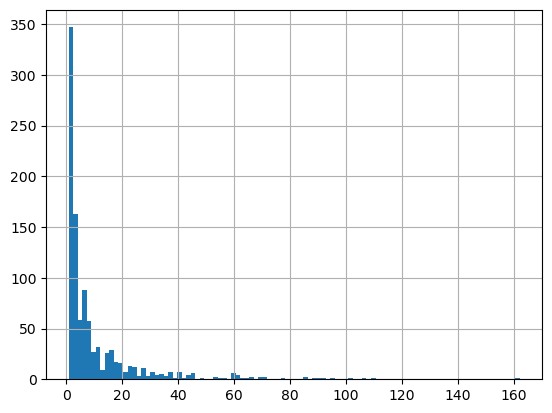

In [40]:
radiology_df['subject_id'].value_counts().hist(bins=100)

**radiology_detail.csv**

In [51]:
# Mostly useless
# Load first 10k rows out of 6046122
radiology_detail_df = pd.read_csv(mimic_note_dir + '/radiology_detail.csv', nrows=10000)
radiology_detail_df.head(5)

,note_id,subject_id,field_name,field_value,field_ordinal
0,10000032-RR-14,10000032,exam_code,C11,1
1,10000032-RR-14,10000032,exam_name,CHEST (PA & LAT),1
2,10000032-RR-15,10000032,exam_code,U314,1
3,10000032-RR-15,10000032,exam_code,U644,3
4,10000032-RR-15,10000032,exam_code,W82,2


**discharge.csv**

In [54]:
# note_id : Unique, can be row index
# subject_id : Patient identifier (997 unique / 10k)
# hadm_id : Not sure, hospital admittance id? (1325 unique / 10k) 
# note_type : All DS (10k / 10k) (Discharge?) 
# note_seq : Chronological index for a patient's note
# charttime : Weird time formatting, malformed?
# storetime : Same issue
# text : Semi-structured discharge report

# Load first 10k rows out of 331794
discharge_df = pd.read_csv(mimic_note_dir + '/discharge.csv', nrows=10000)
discharge_df.head(2)

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
0,10000032-DS-21,10000032,22595853,DS,21,2180-05-07 00:00:00,2180-05-09 15:26:00,\nName: ___ Unit No: _...
1,10000032-DS-22,10000032,22841357,DS,22,2180-06-27 00:00:00,2180-07-01 10:15:00,\nName: ___ Unit No: _...


In [53]:
discharge_df['note_type'].value_counts()

note_type
DS    10000
Name: count, dtype: int64

In [17]:
pp.pprint(discharge_df.iloc[0]['text'])

(' \n'
 'Name:  ___                     Unit No:   ___\n'
 ' \n'
 'Admission Date:  ___              Discharge Date:   ___\n'
 ' \n'
 'Date of Birth:  ___             Sex:   F\n'
 ' \n'
 'Service: MEDICINE\n'
 ' \n'
 'Allergies: \n'
 'No Known Allergies / Adverse Drug Reactions\n'
 ' \n'
 'Attending: ___\n'
 ' \n'
 'Chief Complaint:\n'
 'Worsening ABD distension and pain \n'
 ' \n'
 'Major Surgical or Invasive Procedure:\n'
 'Paracentesis\n'
 '\n'
 ' \n'
 'History of Present Illness:\n'
 '___ HCV cirrhosis c/b ascites, hiv on ART, h/o IVDU, COPD, \n'
 'bioplar, PTSD, presented from OSH ED with worsening abd \n'
 'distension over past week.  \n'
 'Pt reports self-discontinuing lasix and spirnolactone ___ weeks \n'
 'ago, because she feels like "they don\'t do anything" and that \n'
 'she "doesn\'t want to put more chemicals in her." She does not \n'
 'follow Na-restricted diets. In the past week, she notes that she \n'
 'has been having worsening abd distension and discomfort. She \n'
 

### MIMIC-IV 

https://physionet.org/content/mimiciv/2.2/


#### Hosp Module

The hosp module contains data derived from the hospital wide EHR. These measurements are predominantly recorded during the hospital stay, though some tables include data from outside the hospital as well (e.g. outpatient laboratory tests in labevents). Patient demographics (patients), hospitalizations (admissions), and intra-hospital transfers (transfers) are recorded in the hosp module.

Notably, the patients table provides timing information for each patient through the anchor_year and anchor_year_group columns. The anchor_year is a deidentified year occurring sometime between 2100 - 2200, and the anchor_year_group is a three year long date ranges between 2008 - 2019. These pieces of information allow researchers to infer the approximate year a patient received care. For example, if a patient's anchor_year is 2158, and their anchor_year_group is 2011 - 2013, then any hospitalizations for the patient occurring in the year 2158 actually occurred sometime between 2011 - 2013. Finally, the anchor_age provides the patient age in the given anchor_year. If the patient was over 89 in the anchor_year, this anchor_age has been set to 91 (i.e. all patients over 89 have been grouped together into a single group with value 91, regardless of what their real age was).

Date of death is available within the dod column of the patients table. Date of death is derived from hospital records and state records. If both exist, hospital records take precedence. State records were matched using a custom rule based linkage algorithm based on name, date of birth, and social security number. State and hospital records for date of death were collected two years after the last patient discharge in MIMIC-IV, which should limit the impact of reporting delays in date of death.

Dates of death occurring more than one year after hospital discharge are censored as a part of the deidentification process. As a result, the maximum time of follow up for each patient is exactly one year after their last hospital discharge. For example, if a patient's last hospital discharge occurs on 2150-01-01, then the last possible date of death for the patient is 2151-01-01. If the individual died on or before 2151-01-01, and it was captured in either state or hospital death records, then the dod column will contain the deidentified date of death. If the individual survived for at least one year after their last hospital discharge, then the dod column will have a NULL value.

Other information in the hosp module includes laboratory measurements (labevents, d_labitems), microbiology cultures (microbiologyevents, d_micro), provider orders (poe, poe_detail), medication administration (emar, emar_detail), medication prescription (prescriptions, pharmacy), hospital billing information (diagnoses_icd, d_icd_diagnoses, procedures_icd, d_icd_procedures, hcpcsevents, d_hcpcs, drgcodes), online medical record data (omr), and service related information (services).

Provider information is available in the provider table. The provider_id column is a deidentified character string which uniquely represents a single care provider. As provider_id is used in different contexts across the module, a prefix is usually present in data tables to contextualize how the provider relates to the event. For example, the provider who admits the patient to the hospital is documented in the admissions table as admit_provider_id. All columns which have a suffix of provider_id may be linked to the provider table.


In [58]:
mimic_hosp_dir = os.path.join(mimic_dir, 'mimic-iv-2.2/hosp')
sorted(os.listdir(mimic_hosp_dir))

['.DS_Store',
 'admissions.csv',
 'd_hcpcs.csv',
 'd_icd_diagnoses.csv',
 'd_icd_procedures.csv',
 'd_labitems.csv',
 'diagnoses_icd.csv',
 'drgcodes.csv',
 'emar.csv',
 'emar_detail.csv',
 'hcpcsevents.csv',
 'labevents.csv',
 'microbiologyevents.csv',
 'omr.csv',
 'patients.csv',
 'pharmacy.csv',
 'poe.csv',
 'poe_detail.csv',
 'prescriptions.csv',
 'procedures_icd.csv',
 'provider.csv',
 'services.csv',
 'transfers.csv']

In [ ]:
#  Data                       Size      Rows
# 'admissions.csv',         - 73.1 MB   431232      
# 'd_hcpcs.csv',            - 3.3 MB    89201
# 'd_icd_diagnoses.csv',    - 8.8 MB    109776      
# 'd_icd_procedures.csv',   - 7.3 MB    85258
# 'd_labitems.csv',         - 64 KB     1623
# 'diagnoses_icd.csv',      - 134.8 MB  109776
# 'drgcodes.csv',           - 42.1 MB   604378
# 'emar.csv',               - 3.9 GB    26850360
# 'emar_detail.csv',        - 5.47 GB   54744790
# 'hcpcsevents.csv',        - 9.7 MB    150772
# 'labevents.csv',          - 13.73 GB  118171368
# 'microbiologyevents.csv', - 741.2 MB  3228714
# 'omr.csv',                - 266 MB    6439170
# 'patients.csv',           - 9.9 MB    299713
# 'pharmacy.csv',           - 3.03 GB   13584515
# 'poe.csv',                - 3.84 GB   39366292
# 'poe_detail.csv',         - 244.6 MB  3879419
# 'prescriptions.csv',      - 2.65 GB   15416709
# 'procedures_icd.csv',     - 26.3 MB   669187
# 'provider.csv',           - 284 KB    40509
# 'services.csv',           - 20.6 MB   468030
# 'transfers.csv'           - 157.4 MB  1890973

In [64]:
for file in sorted(os.listdir(mimic_hosp_dir)):
    if file.endswith('.csv'):
        num_rows = count_rows(os.path.join(mimic_hosp_dir, file))
        print(file, num_rows)

admissions.csv 431232
d_hcpcs.csv 89201
d_icd_diagnoses.csv 109776
d_icd_procedures.csv 85258
d_labitems.csv 1623
diagnoses_icd.csv 4756327
drgcodes.csv 604378
emar.csv 26850360
emar_detail.csv 54744790
hcpcsevents.csv 150772
labevents.csv 118171368
microbiologyevents.csv 3228714
omr.csv 6439170
patients.csv 299713
pharmacy.csv 13584515
poe.csv 39366292
poe_detail.csv 3879419
prescriptions.csv 15416709
procedures_icd.csv 669187
provider.csv 40509
services.csv 468030
transfers.csv 1890973


**admissions.csv**

73.1 MB   
431232 rows  

In [67]:
# subject_id               int64    4344 unique / 10k
# hadm_id                  int64    10k unique / 10k
# admittime               object
# dischtime               object
# deathtime               object    9807 NaN (survived) / 10k
# admission_type          object    Categorical Emergency, referral, etc.
# admit_provider_id       object
# admission_location      object    ER, physician etc.
# discharge_location      object
# insurance               object
# language                object
# marital_status          object
# race                    object
# edregtime               object
# edouttime               object
# hospital_expire_flag     int64    Deceased boolean

admissions_df = pd.read_csv(mimic_hosp_dir + '/admissions.csv', nrows=10000)
admissions_df.head(2)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0


In [80]:
# 4344 unique subject IDs
len(admissions_df['subject_id'].unique())

4344

In [81]:
# 10000 unique
len(admissions_df['hadm_id'].unique())

10000

In [77]:
# 9807 / 10k survived
sum(admissions_df['deathtime'].isna())

9807

In [94]:
# Deceased boolean
admissions_df['hospital_expire_flag'].value_counts()

hospital_expire_flag
0    9806
1     194
Name: count, dtype: int64

/var/folders/dv/lndb9rrs2kv2v5g8cyfyx0wr0000gn/T/ipykernel_10106/3439478654.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Admission Type', data=admission_counts, palette='viridis')


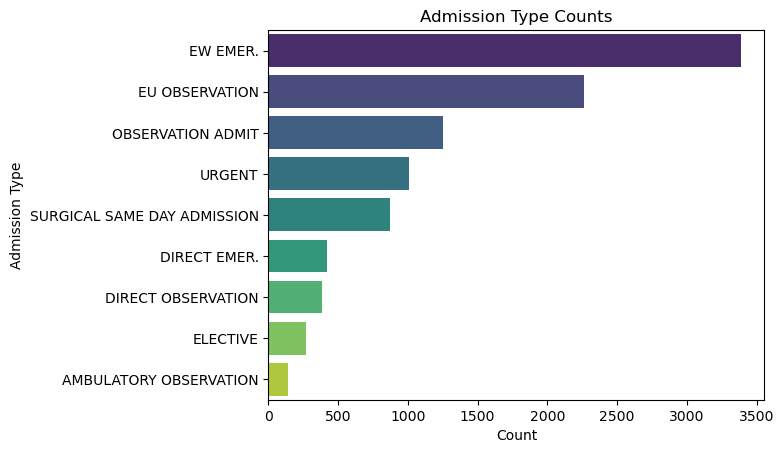

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute value counts
admission_counts = admissions_df['admission_type'].value_counts().reset_index()
admission_counts.columns = ['Admission Type', 'Count']

# Create bar plot using seaborn
sns.barplot(x='Count', y='Admission Type', data=admission_counts, palette='viridis')
plt.title('Admission Type Counts')
plt.xlabel('Count')
plt.ylabel('Admission Type')
plt.show()


In [115]:
admissions_df['admission_location'].value_counts()[:5]

admission_location
EMERGENCY ROOM            5429
PHYSICIAN REFERRAL        2627
TRANSFER FROM HOSPITAL     841
WALK-IN/SELF REFERRAL      368
CLINIC REFERRAL            232
Name: count, dtype: int64

In [114]:
admissions_df['discharge_location'].value_counts()[:5]

discharge_location
HOME                        3613
HOME HEALTH CARE            1785
SKILLED NURSING FACILITY     982
REHAB                        217
DIED                         192
Name: count, dtype: int64

In [97]:
# insurance               
admissions_df['insurance'].value_counts()

insurance
Other       5224
Medicare    3770
Medicaid    1006
Name: count, dtype: int64

In [98]:
# language   
admissions_df['language'].value_counts()             

language
ENGLISH    9076
?           924
Name: count, dtype: int64

In [99]:
# marital_status          
admissions_df['marital_status'].value_counts()

marital_status
MARRIED     4349
SINGLE      3589
WIDOWED      990
DIVORCED     859
Name: count, dtype: int64

In [113]:
# race       
admissions_df['race'].value_counts()[:5]

race
WHITE                     6560
BLACK/AFRICAN AMERICAN    1340
OTHER                      354
UNKNOWN                    244
WHITE - OTHER EUROPEAN     209
Name: count, dtype: int64

**d_hcpcs.csv**

3.3 MB    
89201 rows

Code lookup table with short descriptions and category codes (1,2,3)

In [102]:
# code                  object  unique
# category             float64  3 uniques
# long_description     float64  empty
# short_description     object  67 uniques, 79% 'Integumentary system'

d_hcpcs_df = pd.read_csv(mimic_hosp_dir + '/d_hcpcs.csv', nrows=10000)
d_hcpcs_df.head()

,code,category,long_description,short_description
0,00000,NaN,NaN,Invalid Code
1,0001F,2.0,NaN,Composite measures
2,0002F,2.0,NaN,Composite measures
3,0003F,2.0,NaN,Composite measures
4,0004F,2.0,NaN,Composite measures


In [117]:
d_hcpcs_df['short_description'].value_counts()[:5]

short_description
Integumentary system                     7933
Patient history                           221
Various Services - Category III Codes     169
Knee and popliteal area                   125
Head                                      123
Name: count, dtype: int64

**d_icd_diagnoses.csv**

8.8 MB    
109776 rows

Lookup table for ICD codes and diagnosis descriptions

In [118]:
# icd_code        int64     Diagnosis code
# icd_version     int64     Mostly version 9
# long_title     object     Diagnosis description

d_icd_diagnoses_df = pd.read_csv(mimic_hosp_dir + '/d_icd_diagnoses.csv', nrows=10000)
d_icd_diagnoses_df.head()

,icd_code,icd_version,long_title
0,10,9,Cholera due to vibrio cholerae
1,11,9,Cholera due to vibrio cholerae el tor
2,19,9,"Cholera, unspecified"
3,20,9,Typhoid fever
4,21,9,Paratyphoid fever A


**d_icd_procedures.csv**

7.3 MB    
85258 rows

Lookup table for ICD procedures and descriptions

In [127]:
# icd_code       object     ICD Procedure code
# icd_version     int64     Mostly version 10
# long_title     object     Procedure description

d_icd_procedures_df = pd.read_csv(mimic_hosp_dir + '/d_icd_procedures.csv', nrows=10000)
d_icd_procedures_df.head()

,icd_code,icd_version,long_title
0,0001,9,Therapeutic ultrasound of vessels of head and ...
1,0002,9,Therapeutic ultrasound of heart
2,0003,9,Therapeutic ultrasound of peripheral vascular ...
3,0009,9,Other therapeutic ultrasound
4,001,10,"Central Nervous System and Cranial Nerves, Bypass"


In [130]:
d_icd_procedures_df['icd_version'].value_counts()

icd_version
10    9829
9      171
Name: count, dtype: int64

**d_labitems.csv**

64 KB     
1623 rows

Lookup table for lab items, descriptions

In [131]:
# itemid       int64
# label       object    Mostly unique
# fluid       object    Mostly Blood, Urine
# category    object    Mostly Hematology, Chemistry

d_labitems_df = pd.read_csv(mimic_hosp_dir + '/d_labitems.csv', nrows=10000)
d_labitems_df.head()

,itemid,label,fluid,category
0,50801,Alveolar-arterial Gradient,Blood,Blood Gas
1,50802,Base Excess,Blood,Blood Gas
2,50803,"Calculated Bicarbonate, Whole Blood",Blood,Blood Gas
3,50804,Calculated Total CO2,Blood,Blood Gas
4,50805,Carboxyhemoglobin,Blood,Blood Gas


In [145]:
d_labitems_df['label'].value_counts()[:5]

label
Delete             32
Voided Specimen    20
Beta                8
Alpha-2             8
Alpha-1             8
Name: count, dtype: int64

In [144]:
d_labitems_df['category'].value_counts()[:5]

category
Hematology    781
Chemistry     777
Blood Gas      64
Name: count, dtype: int64

**diagnoses_icd.csv**

134.8 MB  
109776 rows 

Table of subjects and ICD diagnosis codes  
Can join this table with others based on subject_id, hadm_id, icd_code  

In [146]:
# subject_id      int64
# hadm_id         int64
# seq_num         int64
# icd_code       object
# icd_version     int64

diagnoses_icd_df = pd.read_csv(mimic_hosp_dir + '/diagnoses_icd.csv', nrows=10000)
diagnoses_icd_df.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9


**drgcodes.csv**

42.1 MB   
604378 rows

Drugs assigned to patients, or possibly history?

In [148]:
drgcodes_df = pd.read_csv(mimic_hosp_dir + '/drgcodes.csv', nrows=10000)
drgcodes_df.head()

,subject_id,hadm_id,drg_type,drg_code,description,drg_severity,drg_mortality
0,10000032,22595853,APR,283,OTHER DISORDERS OF THE LIVER,2.0,2.0
1,10000032,22595853,HCFA,442,"DISORDERS OF LIVER EXCEPT MALIG,CIRR,ALC HEPA ...",NaN,NaN
2,10000032,22841357,APR,279,HEPATIC COMA & OTHER MAJOR ACUTE LIVER DISORDERS,3.0,2.0
3,10000032,22841357,HCFA,442,"DISORDERS OF LIVER EXCEPT MALIG,CIRR,ALC HEPA ...",NaN,NaN
4,10000032,25742920,APR,283,OTHER DISORDERS OF THE LIVER,3.0,2.0


In [150]:
drgcodes_df['drg_type'].value_counts()

drg_type
HCFA    5164
APR     4836
Name: count, dtype: int64

In [151]:
drgcodes_df['drg_severity'].value_counts()

drg_severity
2.0    1717
3.0    1554
1.0     991
4.0     574
Name: count, dtype: int64

**emar.csv**

3.9 GB    
26850360 rows

Log of medications prescribed to patients while at hospital

In [152]:
# subject_id             int64
# hadm_id              float64
# emar_id               object  subject_id + emar_seq
# emar_seq               int64
# poe_id                object  subject_id + some index
# pharmacy_id          float64
# enter_provider_id     object
# charttime             object
# medication            object  Drug
# event_txt             object
# scheduletime          object
# storetime             object

emar_df = pd.read_csv(mimic_hosp_dir + '/emar.csv', nrows=10000)
emar_df.head()

,subject_id,hadm_id,emar_id,emar_seq,poe_id,pharmacy_id,enter_provider_id,charttime,medication,event_txt,scheduletime,storetime
0,10000032,22595853.0,10000032-10,10,10000032-36,48770010.0,NaN,2180-05-07 00:44:00,Potassium Chloride,Administered,2180-05-07 00:44:00,2180-05-07 00:44:00
1,10000032,22595853.0,10000032-11,11,10000032-22,14779570.0,NaN,2180-05-07 00:44:00,Sodium Chloride 0.9% Flush,Flushed,2180-05-07 00:44:00,2180-05-07 00:44:00
2,10000032,22595853.0,10000032-12,12,10000032-37,93463122.0,NaN,2180-05-07 06:10:00,Ipratropium Bromide Neb,Administered,2180-05-07 06:00:00,2180-05-07 06:10:00
3,10000032,22595853.0,10000032-13,13,10000032-28,42497745.0,NaN,2180-05-07 05:00:00,Albuterol Inhaler,Administered,2180-05-07 06:29:00,2180-05-07 06:29:00
4,10000032,22595853.0,10000032-14,14,10000032-29,69131933.0,NaN,2180-05-07 07:51:00,Emtricitabine-Tenofovir (Truvada),Administered,2180-05-07 08:00:00,2180-05-07 07:56:00


**emar_detail.csv**

5.47 GB   
54744790 rows

Many empty columns, probably not needed

In [155]:
emar_detail_df = pd.read_csv(mimic_hosp_dir + '/emar_detail.csv', nrows=10000)
emar_detail_df.head()

,subject_id,emar_id,emar_seq,parent_field_ordinal,administration_type,pharmacy_id,barcode_type,reason_for_no_barcode,complete_dose_not_given,dose_due,...,infusion_rate_unit,route,infusion_complete,completion_interval,new_iv_bag_hung,continued_infusion_in_other_location,restart_interval,side,site,non_formulary_visual_verification
0,10000032,10000032-10,10,1.1,NaN,48770010.0,if,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10000032,10000032-10,10,1.2,NaN,48770010.0,if,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10000032,10000032-10,10,1.3,NaN,48770010.0,if,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000032,10000032-10,10,1.4,NaN,48770010.0,if,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10000032,10000032-10,10,NaN,Standard Maintenance Medication,NaN,NaN,NaN,No,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**hcpcsevents.csv**

9.7 MB    
150772 rows

Various event codes for patients

In [159]:
# subject_id            int64
# hadm_id               int64
# chartdate            object
# hcpcs_cd             object
# seq_num               int64
# short_description    object

hcpcsevents_df = pd.read_csv(mimic_hosp_dir + '/hcpcsevents.csv', nrows=10000)
hcpcsevents_df.head()

,subject_id,hadm_id,chartdate,hcpcs_cd,seq_num,short_description
0,10000068,25022803,2160-03-04,99218,1,Hospital observation services
1,10000084,29888819,2160-12-28,G0378,1,Hospital observation per hr
2,10000108,27250926,2163-09-27,99219,1,Hospital observation services
3,10000117,22927623,2181-11-15,43239,1,Digestive system
4,10000117,22927623,2181-11-15,G0378,2,Hospital observation per hr


**labevents.csv**

13.73 GB  
118171368 rows

Interesting data with different lab results, abnormal flag, priority flag, comments

In [161]:
# labevent_id            int64
# subject_id             int64
# hadm_id              float64
# specimen_id            int64
# itemid                 int64
# order_provider_id     object
# charttime             object
# storetime             object
# value                 object
# valuenum             float64
# valueuom              object
# ref_range_lower      float64
# ref_range_upper      float64
# flag                  object
# priority              object
# comments              object

labevents_df = pd.read_csv(mimic_hosp_dir + '/labevents.csv', nrows=10000)
labevents_df.head()

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
0,1,10000032,NaN,45421181,51237,P28Z0X,2180-03-23 11:51:00,2180-03-23 15:15:00,1.4,1.4,NaN,0.9,1.1,abnormal,ROUTINE,NaN
1,2,10000032,NaN,45421181,51274,P28Z0X,2180-03-23 11:51:00,2180-03-23 15:15:00,___,15.1,sec,9.4,12.5,abnormal,ROUTINE,VERIFIED.
2,3,10000032,NaN,52958335,50853,P28Z0X,2180-03-23 11:51:00,2180-03-25 11:06:00,___,15.0,ng/mL,30.0,60.0,abnormal,ROUTINE,NEW ASSAY IN USE ___: DETECTS D2 AND D3 25-OH ...
3,4,10000032,NaN,52958335,50861,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,102,102.0,IU/L,0.0,40.0,abnormal,ROUTINE,NaN
4,5,10000032,NaN,52958335,50862,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,3.3,3.3,g/dL,3.5,5.2,abnormal,ROUTINE,NaN


In [164]:
labevents_df['flag'].value_counts()

flag
abnormal    2700
Name: count, dtype: int64

In [163]:
labevents_df['priority'].value_counts()

priority
ROUTINE    4993
STAT       4951
Name: count, dtype: int64

**microbiologyevents.csv**

741.2 MB  
3228714 rows

Blood test results, Interesting comments  
Lots of extra columns  

In [165]:
microbiologyevents_df = pd.read_csv(mimic_hosp_dir + '/microbiologyevents.csv', nrows=10000)
microbiologyevents_df.head()

,microevent_id,subject_id,hadm_id,micro_specimen_id,order_provider_id,chartdate,charttime,spec_itemid,spec_type_desc,test_seq,...,org_name,isolate_num,quantity,ab_itemid,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation,comments
0,1,10000032,NaN,636109,P28Z0X,2180-03-23 00:00:00,2180-03-23 11:51:00,70093,Blood (Toxo),1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE FOR TOXOPLASMA IgG ANTIBODY BY EIA. ...
1,2,10000032,NaN,1836584,P28Z0X,2180-03-23 00:00:00,2180-03-23 11:51:00,70017,SEROLOGY/BLOOD,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE BY EIA. A positive IgG result genera...
2,3,10000032,NaN,4131591,P28Z0X,2180-03-23 00:00:00,2180-03-23 11:51:00,70087,Blood (CMV AB),1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,___
3,4,10000032,NaN,4131591,P28Z0X,2180-03-23 00:00:00,2180-03-23 11:51:00,70087,Blood (CMV AB),2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE FOR CMV IgM ANTIBODY BY EIA. INTERPR...
4,5,10000032,NaN,6028147,P28Z0X,2180-03-23 00:00:00,2180-03-23 11:51:00,70088,Blood (EBV),1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE BY EIA.


**omr.csv**

266 MB    
6439170 rows

Observational medical readings 

In [167]:
omr_df = pd.read_csv(mimic_hosp_dir + '/omr.csv', nrows=10000)
omr_df.head()

,subject_id,chartdate,seq_num,result_name,result_value
0,10000032,2180-04-27,1,Blood Pressure,110/65
1,10000032,2180-04-27,1,Weight (Lbs),94
2,10000032,2180-05-07,1,BMI (kg/m2),18.0
3,10000032,2180-05-07,1,Height (Inches),60
4,10000032,2180-05-07,1,Weight (Lbs),92.15


In [168]:
omr_df['result_name'].value_counts()

result_name
Blood Pressure                     3388
Weight (Lbs)                       2897
BMI (kg/m2)                        2590
Height (Inches)                    1107
Blood Pressure Sitting                7
Blood Pressure Standing (1 min)       7
Blood Pressure Lying                  4
Name: count, dtype: int64

**patients.csv**

9.9 MB    
299713 rows

Patient demographics

In [169]:
patients_df = pd.read_csv(mimic_hosp_dir + '/patients.csv', nrows=10000)
patients_df.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN


**pharmacy.csv**

3.03 GB   
13584515 rows



In [171]:
pharmacy_df = pd.read_csv(mimic_hosp_dir + '/pharmacy.csv', nrows=10000)
pharmacy_df.head()

,subject_id,hadm_id,pharmacy_id,poe_id,starttime,stoptime,medication,proc_type,status,entertime,...,basal_rate,one_hr_max,doses_per_24_hrs,duration,duration_interval,expiration_value,expiration_unit,expirationdate,dispensation,fill_quantity
0,10000032,22595853,11700683,10000032-34,2180-05-07 01:00:00,2180-05-07 22:00:00,Acetaminophen,Unit Dose,Discontinued via patient discharge,2180-05-07 00:09:24,...,NaN,NaN,NaN,NaN,Ongoing,36.0,Hours,NaN,Omnicell,NaN
1,10000032,22595853,14779570,10000032-22,2180-05-07 00:00:00,2180-05-07 22:00:00,Sodium Chloride 0.9% Flush,Unit Dose,Discontinued via patient discharge,2180-05-07 00:00:54,...,NaN,NaN,3.0,NaN,Ongoing,36.0,Hours,NaN,Floor Stock Item,NaN
2,10000032,22595853,19796602,10000032-50,2180-05-08 08:00:00,2180-05-07 22:00:00,Furosemide,Unit Dose,Discontinued via patient discharge,2180-05-07 09:32:35,...,NaN,NaN,1.0,NaN,Ongoing,36.0,Hours,NaN,Omnicell,NaN
3,10000032,22595853,20256254,10000032-32,2180-05-07 01:00:00,2180-05-07 22:00:00,Raltegravir,Unit Dose,Discontinued via patient discharge,2180-05-07 00:09:24,...,NaN,NaN,2.0,NaN,Ongoing,36.0,Hours,NaN,Omnicell,NaN
4,10000032,22595853,28781051,10000032-27,2180-05-07 00:00:00,2180-05-07 22:00:00,Heparin,Unit Dose,Discontinued via patient discharge,2180-05-07 00:00:54,...,NaN,NaN,3.0,NaN,Ongoing,36.0,Hours,NaN,Omnicell,NaN


In [172]:
pharmacy_df['medication'].value_counts()

medication
Sodium Chloride 0.9%  Flush                                           437
Acetaminophen                                                         361
Heparin                                                               341
Insulin                                                               338
Potassium Chloride                                                    314
                                                                     ... 
Lidocaine                                                               1
DiCLOXacillin                                                           1
Alteplase 1mg/2mL ( Clearance ie. PICC, tunneled access line, PA )      1
RiTONAvir                                                               1
Diphenoxylate-Atropine                                                  1
Name: count, Length: 528, dtype: int64

**poe.csv**

3.84 GB   
39366292 rows



In [173]:
poe_df = pd.read_csv(mimic_hosp_dir + '/poe.csv', nrows=10000)
poe_df.head()

,poe_id,poe_seq,subject_id,hadm_id,ordertime,order_type,order_subtype,transaction_type,discontinue_of_poe_id,discontinued_by_poe_id,order_provider_id,order_status
0,10000032-10,10,10000032,22595853,2180-05-06 20:50:49,Lab,NaN,New,NaN,NaN,P9705S,Inactive
1,10000032-100,100,10000032,22841357,2180-06-26 22:25:43,Respiratory,Oxygen Therapy,New,NaN,NaN,P8971Q,Inactive
2,10000032-102,102,10000032,22841357,2180-06-26 22:37:06,Medications,NaN,D/C,10000032-93,NaN,P8971Q,Inactive
3,10000032-103,103,10000032,22841357,2180-06-26 22:37:06,Medications,NaN,Change,10000032-89,NaN,P8971Q,Inactive
4,10000032-104,104,10000032,22841357,2180-06-27 07:06:36,ADT orders,Admit,Change,10000032-75,NaN,P61HH1,Inactive


**poe_detail.csv**

244.6 MB  
3879419 rows



In [174]:
poe_detail_df = pd.read_csv(mimic_hosp_dir + '/poe_detail.csv', nrows=10000)
poe_detail_df.head()

,poe_id,poe_seq,subject_id,field_name,field_value
0,10000032-104,104,10000032,Admit category,Admit to inpatient
1,10000032-104,104,10000032,Admit to,Medicine
2,10000032-109,109,10000032,Admit category,Admit to inpatient
3,10000032-109,109,10000032,Discharge Planning,Finalized
4,10000032-111,111,10000032,Admit category,Admit to inpatient


**prescriptions.csv**

2.65 GB   
15416709 rows



In [175]:
prescriptions_df = pd.read_csv(mimic_hosp_dir + '/prescriptions.csv', nrows=10000)
prescriptions_df.head()

,subject_id,hadm_id,pharmacy_id,poe_id,poe_seq,order_provider_id,starttime,stoptime,drug_type,drug,...,gsn,ndc,prod_strength,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route
0,10000032,22595853,11700683,10000032-34,34.0,P76JEQ,2180-05-07 01:00:00,2180-05-07 22:00:00,MAIN,Acetaminophen,...,004490,9.041989e+08,500mg Tablet,NaN,500,mg,1,TAB,NaN,PO/NG
1,10000032,22595853,14779570,10000032-22,22.0,P76JEQ,2180-05-07 00:00:00,2180-05-07 22:00:00,MAIN,Sodium Chloride 0.9% Flush,...,NaN,0.000000e+00,10 mL Syringe,NaN,3,mL,0.3,SYR,3.0,IV
2,10000032,22595853,19796602,10000032-50,50.0,P260SK,2180-05-08 08:00:00,2180-05-07 22:00:00,MAIN,Furosemide,...,008209,5.107901e+10,40mg Tablet,NaN,40,mg,1,TAB,1.0,PO/NG
3,10000032,22595853,20256254,10000032-32,32.0,P76JEQ,2180-05-07 01:00:00,2180-05-07 22:00:00,MAIN,Raltegravir,...,063231,6.022761e+06,400 mg Tablet,NaN,400,mg,1,TAB,2.0,PO
4,10000032,22595853,28781051,10000032-27,27.0,P76JEQ,2180-05-07 00:00:00,2180-05-07 22:00:00,MAIN,Heparin,...,006549,6.332303e+10,5000 Units / mL- 1mL Vial,NaN,5000,UNIT,1,mL,3.0,SC


**procedures_icd.csv**

26.3 MB   
669187 rows

In [176]:
procedures_icd_df = pd.read_csv(mimic_hosp_dir + '/procedures_icd.csv', nrows=10000)
procedures_icd_df.head()

,subject_id,hadm_id,seq_num,chartdate,icd_code,icd_version
0,10000032,22595853,1,2180-05-07,5491,9
1,10000032,22841357,1,2180-06-27,5491,9
2,10000032,25742920,1,2180-08-06,5491,9
3,10000068,25022803,1,2160-03-03,8938,9
4,10000117,27988844,1,2183-09-19,0QS734Z,10


**provider.csv**

284 KB    
40509 rows


In [177]:
provider_df = pd.read_csv(mimic_hosp_dir + '/provider.csv', nrows=10000)
provider_df.head()

,provider_id
0,P0003D
1,P000DI
2,P000EW
3,P000H9
4,P000I6


**services.csv**

20.6 MB   
468030 rows



In [178]:
services_df = pd.read_csv(mimic_hosp_dir + '/services.csv', nrows=10000)
services_df.head()

,subject_id,hadm_id,transfertime,prev_service,curr_service
0,10000032,22595853,2180-05-06 22:24:57,NaN,MED
1,10000032,22841357,2180-06-26 18:28:08,NaN,MED
2,10000032,25742920,2180-08-05 23:44:50,NaN,MED
3,10000032,29079034,2180-07-23 12:36:04,NaN,MED
4,10000068,25022803,2160-03-03 23:17:17,NaN,MED


In [179]:
radiology_df = pd.read_csv(mimic_note_dir + '/radiology.csv', nrows=1000)
radiology_df.head()

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
0,10000032-RR-14,10000032,22595853.0,RR,14,2180-05-06 21:19:00,2180-05-06 23:32:00,EXAMINATION: CHEST (PA AND LAT)\n\nINDICATION...
1,10000032-RR-15,10000032,22595853.0,RR,15,2180-05-06 23:00:00,2180-05-06 23:26:00,EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ...
2,10000032-RR-16,10000032,22595853.0,RR,16,2180-05-07 09:55:00,2180-05-07 11:15:00,"INDICATION: ___ HCV cirrhosis c/b ascites, hi..."
3,10000032-RR-18,10000032,NaN,RR,18,2180-06-03 12:46:00,2180-06-03 14:01:00,EXAMINATION: Ultrasound-guided paracentesis.\...
4,10000032-RR-20,10000032,NaN,RR,20,2180-07-08 13:18:00,2180-07-08 14:15:00,EXAMINATION: Paracentesis\n\nINDICATION: ___...


**transfers.csv**

157.4 MB  
1890973 rows

In [180]:
transfers_df = pd.read_csv(mimic_hosp_dir + '/transfers.csv', nrows=10000)
transfers_df.head()

,subject_id,hadm_id,transfer_id,eventtype,careunit,intime,outtime
0,10000032,22595853.0,33258284,ED,Emergency Department,2180-05-06 19:17:00,2180-05-06 23:30:00
1,10000032,22595853.0,35223874,admit,Transplant,2180-05-06 23:30:00,2180-05-07 17:21:27
2,10000032,22595853.0,36904543,discharge,NaN,2180-05-07 17:21:27,NaN
3,10000032,22841357.0,34100253,discharge,NaN,2180-06-27 18:49:12,NaN
4,10000032,22841357.0,34703856,admit,Transplant,2180-06-26 21:31:00,2180-06-27 18:49:12


#### ICU Module

The icu module contains data sourced from the clinical information system at the BIDMC: MetaVision (iMDSoft). MetaVision tables were denormalized to create a star schema where the icustays and d_items tables link to a set of data tables all suffixed with "events". Data documented in the icu module includes intravenous and fluid inputs (inputevents), ingredients for the aforementioned inputs (ingredientevents), patient outputs (outputevents), procedures (procedureevents), information documented as a date or time (datetimeevents), and other charted information (chartevents). All events tables contain a stay_id column allowing identification of the associated ICU patient in icustays, and an itemid column allowing identification of the concept documented in d_items. Additionally, the caregiver table contains caregiver_id, a deidentified integer representing the care provider who documented data into the system. All events tables (chartevents, datetimeevents, ingredientevents, inputevents, outputevents, procedureevents) have a caregiver_id column which links to the caregiver table.

In [65]:
mimic_icu_dir = os.path.join(mimic_dir, 'mimic-iv-2.2/icu')
sorted(os.listdir(mimic_icu_dir))

['.DS_Store',
 'caregiver.csv',
 'chartevents.csv',
 'd_items.csv',
 'datetimeevents.csv',
 'icustays.csv',
 'ingredientevents.csv',
 'inputevents.csv',
 'outputevents.csv',
 'procedureevents.csv']

In [ ]:
#  Data                     Size        Rows
# 'caregiver.csv',          91 KB       15469 
# 'chartevents.csv',        30.2 GB     313645064
# 'd_items.csv',            369 KB      4015
# 'datetimeevents.csv',     777.8 MB    7113000
# 'icustays.csv',           11.5 MB     73182
# 'ingredientevents.csv',   2.01 GB     11627822
# 'inputevents.csv',        2.35 GB     8978894
# 'outputevents.csv',       365.4 MB    4234968
# 'procedureevents.csv'     129.5 MB    696093

In [66]:
for file in sorted(os.listdir(mimic_icu_dir)):
    if file.endswith('.csv'):
        num_rows = count_rows(os.path.join(mimic_icu_dir, file))
        print(file, num_rows)

caregiver.csv 15469
chartevents.csv 313645064
d_items.csv 4015
datetimeevents.csv 7113000
icustays.csv 73182
ingredientevents.csv 11627822
inputevents.csv 8978894
outputevents.csv 4234968
procedureevents.csv 696093


**caregiver.csv**

91 KB       
15469 rows

Physician / Nurse IDs probably

In [181]:
caregiver_df = pd.read_csv(mimic_icu_dir + '/caregiver.csv', nrows=10000)
caregiver_df.head()


,caregiver_id
0,10
1,17
2,20
3,25
4,27


**chartevents.csv**

30.2 GB     
313645064 rows

Excessive chronological information from continuous monitoring

In [182]:
chartevents_df = pd.read_csv(mimic_icu_dir + '/chartevents.csv', nrows=10000)
chartevents_df.head()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
0,10000032,29079034,39553978,47007.0,2180-07-23 21:01:00,2180-07-23 22:15:00,220179,82,82.0,mmHg,0.0
1,10000032,29079034,39553978,47007.0,2180-07-23 21:01:00,2180-07-23 22:15:00,220180,59,59.0,mmHg,0.0
2,10000032,29079034,39553978,47007.0,2180-07-23 21:01:00,2180-07-23 22:15:00,220181,63,63.0,mmHg,0.0
3,10000032,29079034,39553978,47007.0,2180-07-23 22:00:00,2180-07-23 22:15:00,220045,94,94.0,bpm,0.0
4,10000032,29079034,39553978,47007.0,2180-07-23 22:00:00,2180-07-23 22:15:00,220179,85,85.0,mmHg,0.0


**d_items.csv**

369 KB      
4015 rows



In [183]:
d_items_df = pd.read_csv(mimic_icu_dir + '/d_items.csv', nrows=10000)
d_items_df.head()

,itemid,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
0,220001,Problem List,Problem List,chartevents,General,NaN,Text,NaN,NaN
1,220003,ICU Admission date,ICU Admission date,datetimeevents,ADT,NaN,Date and time,NaN,NaN
2,220045,Heart Rate,HR,chartevents,Routine Vital Signs,bpm,Numeric,NaN,NaN
3,220046,Heart rate Alarm - High,HR Alarm - High,chartevents,Alarms,bpm,Numeric,NaN,NaN
4,220047,Heart Rate Alarm - Low,HR Alarm - Low,chartevents,Alarms,bpm,Numeric,NaN,NaN


**datetimeevents.csv**

777.8 MB    
7113000 rows



In [184]:
datetimeevents_df = pd.read_csv(mimic_icu_dir + '/datetimeevents.csv', nrows=10000)
datetimeevents_df.head()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valueuom,warning
0,10000032,29079034,39553978,66056,2180-07-23 21:02:00,2180-07-23 21:02:00,225754,2180-07-23 00:00:00,Date,0
1,10000032,29079034,39553978,66056,2180-07-23 21:02:00,2180-07-23 21:02:00,225755,2180-07-23 00:00:00,Date,0
2,10000032,29079034,39553978,88981,2180-07-23 14:24:00,2180-07-23 14:24:00,225754,2180-07-23 14:24:00,Date,0
3,10000032,29079034,39553978,88981,2180-07-23 14:24:00,2180-07-23 14:24:00,225755,2180-07-23 14:24:00,Date,0
4,10000980,26913865,39765666,36518,2189-06-27 09:13:00,2189-06-27 09:13:00,225755,2189-06-27 09:13:00,Date,0


**icustays.csv**

11.5 MB     
73182 rows



In [185]:
icustays_df = pd.read_csv(mimic_icu_dir + '/icustays.csv', nrows=10000)
icustays_df.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266
1,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535
2,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032
3,10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.948113
4,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588


**ingredientevents.csv**

2.01 GB     
11627822 rows



In [186]:
ingredientevents_df = pd.read_csv(mimic_icu_dir + '/ingredientevents.csv', nrows=10000)
ingredientevents_df.head()

,subject_id,hadm_id,stay_id,caregiver_id,starttime,endtime,storetime,itemid,amount,amountuom,rate,rateuom,orderid,linkorderid,statusdescription,originalamount,originalrate
0,10000032,29079034,39553978,66056,2180-07-23 21:10:00,2180-07-23 21:11:00,2180-07-23 21:10:00,220490,100.000000,ml,NaN,NaN,415918,415918,FinishedRunning,0,100.0
1,10000032,29079034,39553978,66056,2180-07-23 21:10:00,2180-07-23 21:11:00,2180-07-23 21:10:00,227075,100.000000,ml,NaN,NaN,415918,415918,FinishedRunning,0,100.0
2,10000032,29079034,39553978,88981,2180-07-23 17:00:00,2180-07-23 17:01:00,2180-07-23 18:56:00,220490,200.000000,ml,NaN,NaN,7140773,7140773,FinishedRunning,0,200.0
3,10000032,29079034,39553978,88981,2180-07-23 17:00:00,2180-07-23 17:01:00,2180-07-23 18:56:00,227075,200.000000,ml,NaN,NaN,7140773,7140773,FinishedRunning,0,200.0
4,10000032,29079034,39553978,88981,2180-07-23 17:00:00,2180-07-23 17:30:00,2180-07-23 17:02:00,220490,49.999999,ml,100.0,mL/hour,7578214,7578214,FinishedRunning,0,50.0


**inputevents.csv**

2.35 GB     
8978894 rows



In [187]:
inputevents_df = pd.read_csv(mimic_icu_dir + '/inputevents.csv', nrows=10000)
inputevents_df.head()

,subject_id,hadm_id,stay_id,caregiver_id,starttime,endtime,storetime,itemid,amount,amountuom,...,ordercomponenttypedescription,ordercategorydescription,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,statusdescription,originalamount,originalrate
0,10000032,29079034,39553978,66056,2180-07-23 21:10:00,2180-07-23 21:11:00,2180-07-23 21:10:00,226452,100.000000,ml,...,Main order parameter,Bolus,39.4,100.0,ml,0,0,FinishedRunning,100.0,100.0
1,10000032,29079034,39553978,88981,2180-07-23 17:00:00,2180-07-23 17:01:00,2180-07-23 18:56:00,226452,200.000000,ml,...,Main order parameter,Bolus,39.4,200.0,ml,0,0,FinishedRunning,200.0,200.0
2,10000032,29079034,39553978,88981,2180-07-23 17:00:00,2180-07-23 17:30:00,2180-07-23 17:02:00,220862,49.999999,ml,...,Main order parameter,Continuous IV,39.4,50.0,ml,0,0,FinishedRunning,50.0,100.0
3,10000032,29079034,39553978,88981,2180-07-23 17:33:00,2180-07-23 18:03:00,2180-07-23 18:16:00,220862,49.999999,ml,...,Main order parameter,Continuous IV,39.4,50.0,ml,0,0,FinishedRunning,50.0,100.0
4,10000032,29079034,39553978,88981,2180-07-23 18:56:00,2180-07-23 18:57:00,2180-07-23 18:56:00,226452,100.000000,ml,...,Main order parameter,Bolus,39.4,100.0,ml,0,0,FinishedRunning,100.0,100.0


**outputevents.csv**

365.4 MB    
4234968 rows



In [188]:
outputevents_df = pd.read_csv(mimic_icu_dir + '/outputevents.csv', nrows=10000)
outputevents_df.head()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valueuom
0,10000032,29079034,39553978,88981,2180-07-23 15:00:00,2180-07-23 16:00:00,226560,175,ml
1,10000980,26913865,39765666,36518,2189-06-27 09:08:00,2189-06-27 09:08:00,226559,450,ml
2,10000980,26913865,39765666,36518,2189-06-27 09:08:00,2189-06-27 09:08:00,226633,400,ml
3,10000980,26913865,39765666,36518,2189-06-27 11:00:00,2189-06-27 10:51:00,226559,600,ml
4,10000980,26913865,39765666,36518,2189-06-27 13:00:00,2189-06-27 12:55:00,226559,800,ml


**procedureevents.csv**

129.5 MB    
696093 rows


In [189]:
procedureevents_df = pd.read_csv(mimic_icu_dir + '/procedureevents.csv', nrows=10000)
procedureevents_df.head()

,subject_id,hadm_id,stay_id,caregiver_id,starttime,endtime,storetime,itemid,value,valueuom,...,orderid,linkorderid,ordercategoryname,ordercategorydescription,patientweight,isopenbag,continueinnextdept,statusdescription,originalamount,originalrate
0,10000032,29079034,39553978,88981.0,2180-07-23 14:43:00,2180-07-23 14:44:00,2180-07-23 14:43:00,225966,1.0,NaN,...,6416557,6416557,Procedures,Task,39.4,0,0,FinishedRunning,1.0,0
1,10000032,29079034,39553978,NaN,2180-07-23 14:24:00,2180-07-23 23:50:00,2180-07-23 23:50:49.983,224275,566.0,min,...,6497934,6497934,Peripheral Lines,ContinuousProcess,39.4,1,0,FinishedRunning,566.0,1
2,10000032,29079034,39553978,NaN,2180-07-23 14:24:00,2180-07-23 23:50:00,2180-07-23 23:50:49.983,224277,566.0,min,...,9643097,9643097,Peripheral Lines,ContinuousProcess,39.4,1,0,FinishedRunning,566.0,1
3,10000980,26913865,39765666,NaN,2189-06-27 09:01:00,2189-06-27 20:38:00,2189-06-27 20:38:29.047,225794,697.0,min,...,5989583,5989583,Ventilation,ContinuousProcess,76.2,1,0,FinishedRunning,697.0,1
4,10000980,26913865,39765666,NaN,2189-06-27 09:15:00,2189-06-27 20:38:00,2189-06-27 20:38:29.047,224277,683.0,min,...,476764,476764,Peripheral Lines,ContinuousProcess,76.2,1,0,FinishedRunning,683.0,1
